In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
DF=df.iloc[:,[0,4]]
DF

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [6]:
DF.iloc[0:20866,:]

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
20861,2013-01-17 05:00:00,45.140
20862,2013-01-17 06:00:00,44.595
20863,2013-01-17 07:00:00,45.540
20864,2013-01-17 08:00:00,47.515


In [7]:
DF.rename(columns = {'FullDate':'ds'}, inplace = True)
DF.rename(columns = {'ElecPrice':'y'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
DF.iloc[0:20866,:]

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
20861,2013-01-17 05:00:00,45.140
20862,2013-01-17 06:00:00,44.595
20863,2013-01-17 07:00:00,45.540
20864,2013-01-17 08:00:00,47.515


In [9]:
dz=DF['ds'].str[:11]

In [10]:
data=pd.DataFrame(dz)
data

,ds
0,2010-09-01
1,2010-09-01
2,2010-09-01
3,2010-09-01
4,2010-09-01
...,...
92011,2021-02-28
92012,2021-02-28
92013,2021-02-28
92014,2021-02-28


In [11]:
DF['ds']=data['ds'].values

<ipython-input-11-753553e26f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['ds']=data['ds'].values


In [12]:
DF['ds']

0        2010-09-01 
1        2010-09-01 
2        2010-09-01 
3        2010-09-01 
4        2010-09-01 
            ...     
92011    2021-02-28 
92012    2021-02-28 
92013    2021-02-28 
92014    2021-02-28 
92015    2021-02-28 
Name: ds, Length: 92016, dtype: object

In [13]:
DF

,ds,y
0,2010-09-01,23.710
1,2010-09-01,22.635
2,2010-09-01,22.565
3,2010-09-01,18.910
4,2010-09-01,18.030
...,...,...
92011,2021-02-28,117.925
92012,2021-02-28,87.880
92013,2021-02-28,62.060
92014,2021-02-28,62.000


In [14]:
datset=DF.iloc[0:20866,:]

In [15]:
datset

,ds,y
0,2010-09-01,23.710
1,2010-09-01,22.635
2,2010-09-01,22.565
3,2010-09-01,18.910
4,2010-09-01,18.030
...,...,...
20861,2013-01-17,45.140
20862,2013-01-17,44.595
20863,2013-01-17,45.540
20864,2013-01-17,47.515


In [28]:
datset.max()

y    12199.115
dtype: float64

In [16]:
from datetime import datetime

datset['ds'] = pd.to_datetime(datset.ds)

datset.set_index('ds', inplace = True)

<ipython-input-16-27ed6be1b75c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datset['ds'] = pd.to_datetime(datset.ds)


In [17]:
df_daily = datset.resample('D').sum()

In [19]:
df_daily

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555
...,...
2013-01-13,1109.600
2013-01-14,1095.950
2013-01-15,1172.775


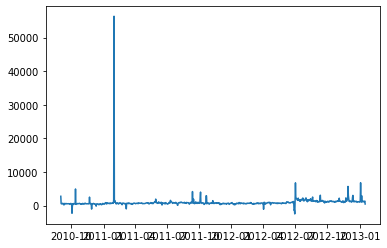

In [20]:
plt.plot(df_daily.index,df_daily.y)

In [117]:
display(datset.iloc[2757])

ds    2010-12-24 
y           24.87
Name: 2757, dtype: object

In [24]:
train_=datset.iloc[18109:20866,:]
test=datset.iloc[2757:,:]

In [170]:
test.shape

(136, 2)

In [171]:
train_.tail()

,ds,y
20861,2013-01-17,45.140
20862,2013-01-17,44.595
20863,2013-01-17,45.540
20864,2013-01-17,47.515
20865,2013-01-17,50.870


In [172]:
train_.shape

(2757, 2)

In [25]:
test

,y
ds,
2010-12-24,24.870
2010-12-24,22.820
2010-12-24,21.185
2010-12-25,20.120
2010-12-25,18.065
...,...
2013-01-17,45.140
2013-01-17,44.595
2013-01-17,45.540


In [174]:
#from datetime import datetime

#train['ds'] = pd.to_datetime(train.ds)

#train.set_index('ds', inplace = True)

In [175]:
train_

,ds,y
18109,2012-09-24,58.085
18110,2012-09-24,59.820
18111,2012-09-24,60.165
18112,2012-09-24,56.290
18113,2012-09-24,56.585
...,...,...
20861,2013-01-17,45.140
20862,2013-01-17,44.595
20863,2013-01-17,45.540
20864,2013-01-17,47.515


In [196]:
train=datset.iloc[0:2757,:]

In [197]:
train.tail()

,ds,y
2752,2010-12-24,36.770
2753,2010-12-24,35.060
2754,2010-12-24,27.980
2755,2010-12-24,28.115
2756,2010-12-24,27.690


In [177]:
from prophet import Prophet

In [178]:
model = Prophet()


In [179]:
model.fit(train_)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl29r39j/qr10nxgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl29r39j/re87qns_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78720', 'data', 'file=/tmp/tmpnl29r39j/qr10nxgq.json', 'init=/tmp/tmpnl29r39j/re87qns_.json', 'output', 'file=/tmp/tmpnl29r39j/prophet_modelf3pbbd9f/prophet_model-20230131144903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [180]:
_future_ = model.make_future_dataframe(periods=20, freq='D') 

In [181]:
_future_.shape
_future_

,ds
0,2012-09-24
1,2012-09-25
2,2012-09-26
3,2012-09-27
4,2012-09-28
...,...
131,2013-02-02
132,2013-02-03
133,2013-02-04
134,2013-02-05


In [182]:
forecast = model.predict(_future_)

In [183]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-09-24,48.362866,-62.888597,171.650764,48.362866,48.362866,-1.836082,-1.836082,-1.836082,-1.836082,-1.836082,-1.836082,0.0,0.0,0.0,46.526784
1,2012-09-25,48.455448,-72.547948,156.809252,48.455448,48.455448,-6.645219,-6.645219,-6.645219,-6.645219,-6.645219,-6.645219,0.0,0.0,0.0,41.810230
2,2012-09-26,48.548030,-70.598928,163.204747,48.548030,48.548030,-2.699141,-2.699141,-2.699141,-2.699141,-2.699141,-2.699141,0.0,0.0,0.0,45.848890
3,2012-09-27,48.640613,-62.105258,168.214705,48.640613,48.640613,9.810406,9.810406,9.810406,9.810406,9.810406,9.810406,0.0,0.0,0.0,58.451019
4,2012-09-28,48.733195,-52.445002,179.091978,48.733195,48.733195,15.179573,15.179573,15.179573,15.179573,15.179573,15.179573,0.0,0.0,0.0,63.912768
5,2012-09-29,48.825777,-81.451992,164.534274,48.825777,48.825777,-5.841724,-5.841724,-5.841724,-5.841724,-5.841724,-5.841724,0.0,0.0,0.0,42.984053
6,2012-09-30,48.918359,-79.046578,163.586120,48.918359,48.918359,-7.967814,-7.967814,-7.967814,-7.967814,-7.967814,-7.967814,0.0,0.0,0.0,40.950546
7,2012-10-01,49.010942,-70.565937,163.523316,49.010942,49.010942,-1.836082,-1.836082,-1.836082,-1.836082,-1.836082,-1.836082,0.0,0.0,0.0,47.174860
8,2012-10-02,49.103528,-66.498140,157.877314,49.103528,49.103528,-6.645219,-6.645219,-6.645219,-6.645219,-6.645219,-6.645219,0.0,0.0,0.0,42.458309
9,2012-10-03,49.196114,-71.953371,156.317537,49.196114,49.196114,-2.699141,-2.699141,-2.699141,-2.699141,-2.699141,-2.699141,0.0,0.0,0.0,46.496973


In [184]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2012-09-24,46.526784,-62.888597,171.650764,48.362866,48.362866,48.362866
1,2012-09-25,41.810230,-72.547948,156.809252,48.455448,48.455448,48.455448
2,2012-09-26,45.848890,-70.598928,163.204747,48.548030,48.548030,48.548030
3,2012-09-27,58.451019,-62.105258,168.214705,48.640613,48.640613,48.640613
4,2012-09-28,63.912768,-52.445002,179.091978,48.733195,48.733195,48.733195
...,...,...,...,...,...,...,...
131,2013-02-02,65.773653,-48.759914,182.014075,71.615378,61.887737,80.095824
132,2013-02-03,64.046477,-55.560038,179.235292,72.014291,61.327912,81.383898
133,2013-02-04,70.577122,-55.203108,186.904680,72.413204,60.645503,82.666578
134,2013-02-05,66.166898,-51.845051,188.359696,72.812117,60.335492,83.882333


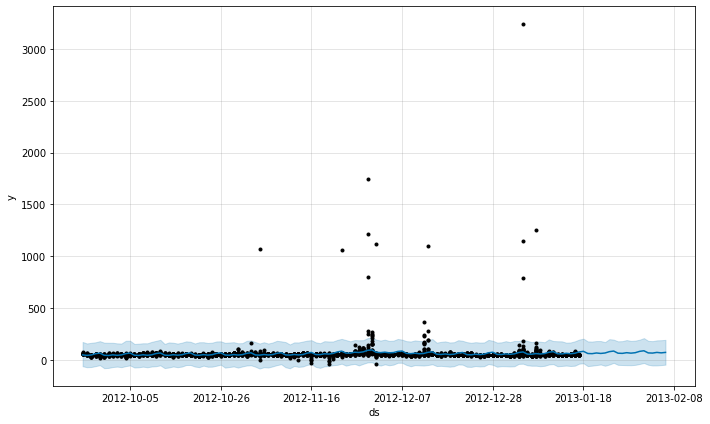

In [185]:
model.plot(forecast)
plt.show()

In [186]:
import numpy as np

def mape(act, pred): 
    act, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100
    

In [187]:
type(pred)

pandas.core.series.Series

In [188]:
#actual = test['y']                                                                                        
#pred = forecast['yhat']

#mape(actual, pred)

In [189]:
act = test['y']      
pred = forecast['yhat']
mape(act, pred)

28.289747760758516

In [190]:
forecast['yhat'].shape


(136,)

In [194]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['y'] ,forecast['yhat']))
a=rmse
print(rmse)

17.037862373448306


In [198]:
from prophet import Prophet
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl29r39j/4kc6k2zi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl29r39j/1l2h47e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27501', 'data', 'file=/tmp/tmpnl29r39j/4kc6k2zi.json', 'init=/tmp/tmpnl29r39j/1l2h47e9.json', 'output', 'file=/tmp/tmpnl29r39j/prophet_modeluynam4_m/prophet_model-20230131150934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [207]:
_future_ = model.make_future_dataframe(periods=20, freq='D') 

In [208]:
forecast_ = model.predict(_future_)

In [209]:
forecast_.shape

(135, 16)

In [210]:
forecast_.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,36.233108,-82.388717,182.789647,36.233108,36.233108,15.473891,15.473891,15.473891,15.473891,15.473891,15.473891,0.0,0.0,0.0,51.706998
1,2010-09-02,35.075727,-94.851174,161.028908,35.075727,35.075727,-0.362449,-0.362449,-0.362449,-0.362449,-0.362449,-0.362449,0.0,0.0,0.0,34.713278
2,2010-09-03,33.918347,-91.818125,161.950050,33.918347,33.918347,-1.526055,-1.526055,-1.526055,-1.526055,-1.526055,-1.526055,0.0,0.0,0.0,32.392292
3,2010-09-04,32.760967,-91.230603,159.783670,32.760967,32.760967,-4.258351,-4.258351,-4.258351,-4.258351,-4.258351,-4.258351,0.0,0.0,0.0,28.502616
4,2010-09-05,31.603705,-105.804938,148.115535,31.603705,31.603705,-13.636711,-13.636711,-13.636711,-13.636711,-13.636711,-13.636711,0.0,0.0,0.0,17.966994
5,2010-09-06,30.446444,-96.961732,156.280478,30.446444,30.446444,3.425356,3.425356,3.425356,3.425356,3.425356,3.425356,0.0,0.0,0.0,33.871801
6,2010-09-07,29.289183,-93.829817,159.026373,29.289183,29.289183,0.884320,0.884320,0.884320,0.884320,0.884320,0.884320,0.0,0.0,0.0,30.173503
7,2010-09-08,28.131922,-80.487745,169.919338,28.131922,28.131922,15.473891,15.473891,15.473891,15.473891,15.473891,15.473891,0.0,0.0,0.0,43.605813
8,2010-09-09,27.329654,-95.379134,147.639388,27.329654,27.329654,-0.362449,-0.362449,-0.362449,-0.362449,-0.362449,-0.362449,0.0,0.0,0.0,26.967205
9,2010-09-10,26.527387,-99.705817,149.129677,26.527387,26.527387,-1.526055,-1.526055,-1.526055,-1.526055,-1.526055,-1.526055,0.0,0.0,0.0,25.001332


In [211]:
forecast_[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,51.706998,-82.388717,182.789647,36.233108,36.233108,36.233108
1,2010-09-02,34.713278,-94.851174,161.028908,35.075727,35.075727,35.075727
2,2010-09-03,32.392292,-91.818125,161.950050,33.918347,33.918347,33.918347
3,2010-09-04,28.502616,-91.230603,159.783670,32.760967,32.760967,32.760967
4,2010-09-05,17.966994,-105.804938,148.115535,31.603705,31.603705,31.603705
...,...,...,...,...,...,...,...
130,2011-01-09,-3.036788,-125.842951,130.095661,10.599923,5.237598,16.082690
131,2011-01-10,13.796594,-110.575622,137.791866,10.371237,4.477639,16.423422
132,2011-01-11,11.026871,-124.338492,141.080212,10.142552,3.660469,16.714440
133,2011-01-12,25.387757,-110.426704,146.449152,9.913866,3.042111,17.031820


In [212]:
test_=datset.iloc[-135:,:]

In [213]:
test_.tail()

,ds,y
20861,2013-01-17,45.140
20862,2013-01-17,44.595
20863,2013-01-17,45.540
20864,2013-01-17,47.515
20865,2013-01-17,50.870


In [214]:
import numpy as np

def mape(actu, pred): 
    actu, pred = np.array(actu), np.array(pred)
    return np.mean(np.abs((actu - pred) / actu)) * 100

In [216]:
actu = test_['y']      
pred = forecast_['yhat']
mape(actu, pred)

56.945438928411996

In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_['y'] ,forecast_['yhat']))
a=rmse
print(rmse)

30.864495889053998


In [21]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 15,8

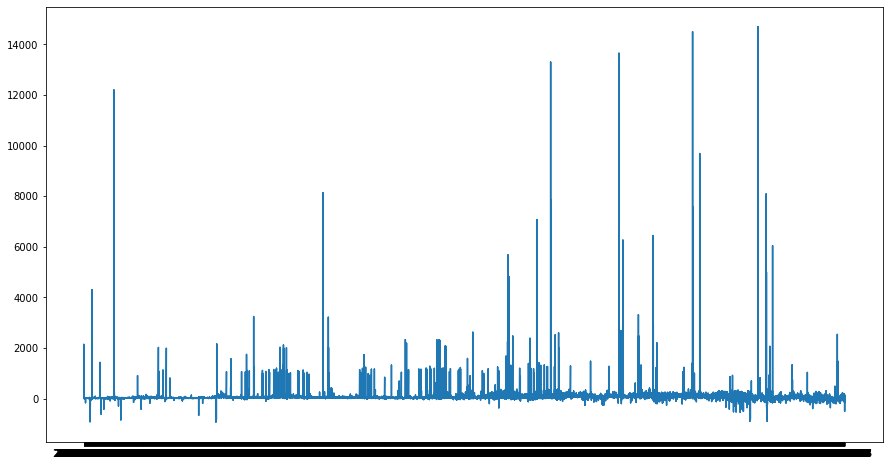

In [23]:
plt.plot(DF['ds'],DF['y'])
plt.show()